# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## Task 1 : Conversion Rate Analysis Based On Income, Spending And Age
Goals : Find a pattern of consumer behavior.<br><br>
Objective : 
- Feature engineering 
- Analyze Conversion Rate with other variables such as age, income, expenses, etc 

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.decomposition import PCA
randomstate=511

### Load Data & Preliminary Analysis

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./data/marketing_campaign_data.csv')
display(df.sample(4))

# Display the information about the DataFrame
print("DataFrame Information:")
df.info()

# Create a DataFrame for the description
desc_df = df.describe().transpose()

# Add the number of unique values to the description DataFrame
desc_df['unique'] = df.nunique()

# Display the description DataFrame
print("\nDataFrame Description:")
display(desc_df)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2001,2001,10757,1967,S3,Cerai,28420000.0,1,0,24-12-2013,36,4000,2000,5000,2000,0,0,1,1,0,2,6,0,0,0,0,0,0,3,11,0
1597,1597,3409,1984,S1,Lajang,36108000.0,1,0,15-10-2013,68,141000,8000,129000,3000,11000,47000,3,7,1,4,9,1,0,0,0,0,0,3,11,0
1078,1078,10855,1968,S2,Lajang,50014000.0,1,0,22-01-2014,9,234000,14000,77000,19000,10000,42000,2,4,1,8,5,0,0,0,0,0,0,3,11,0
1830,1830,6859,1987,S1,Lajang,29236000.0,1,0,08-10-2013,30,37000,4000,24000,16000,9000,9000,2,4,0,3,9,0,0,0,0,0,0,3,11,0


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds   

,count,mean,std,min,25%,50%,75%,max,unique
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0,2240
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0,2240
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0,59
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0,1974
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0,3
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0,3
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0,100
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0,776
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0,158
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0,558


Upon initial inspection of the dataset, we have identified several key points that will influence our data preprocessing steps:

1. **Missing Values:** The dataset contains missing values that need to be handled. Depending on the nature and amount of missing data, we may choose to fill these with appropriate values or drop the rows/columns with missing data.

2. **Outliers:** Some features in the dataset exhibit outliers. These can significantly skew our statistical analysis and machine learning model performance. We will need to identify these outliers and decide on the best strategy to handle them, such as capping, transforming, or removing them.

3. **Redundant Index Column:** The `Unnamed: 0` feature appears to be an index column. Since Pandas DataFrames automatically provide an index, this column is redundant and will be dropped during preprocessing.

4. **Non-informative Columns:** The `Z_CostContact` and `Z_Revenue` features only contain a single unique value. These features do not provide any variability or valuable information for our analysis or predictive modeling, and will therefore be dropped during preprocessing.

### Feature Engineering

In this section, we create new features to better understand our customers and their behaviors. Here's a brief explanation of each new feature:

1. **Age**: This feature represents the age of each customer. It is calculated by subtracting the `Year_Birth` feature from the current year.

2. **AgeGroup**: This feature categorizes customers into different age groups for easier analysis. The age groups are determined based on the customer's `Age` range, as suggested by this [article](https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297). The minimum age in this dataset is 28.

3. **Parent**: This feature indicates the parental status of each customer. It is created based on whether a customer has a kid at home or not.

4. **NumChild**: This feature represents the total number of children each customer has. It is calculated from the sum of the `KidHome` and `TeenHome` features.

5. **TotalAcceptedCmp**: This feature represents the total number of campaigns each customer accepted after the campaign was carried out. It is calculated from the sum of the `AcceptedCmp1` to `AcceptedCmp5` features.

6. **TotalSpending** : This feature represents the total spending each customer spended on our platform. It is calculated from the sum of `MntCoke`,
       `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, and `MntGoldProds` features.

7. **Total Trx**: This feature represents the total number of transactions the customer made in our store, either offline or online. It is calculated from the `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, and `NumStorePurchases` features.

9. **ConversionRate**: This feature represents the percentage of website visitors who complete a web purchase. It is a key metric for understanding the effectiveness of our *online sales efforts*.

In [3]:
# Create a copy of the original dataframe to avoid modifying the original data
dfe = df.copy()

# Calculate the age of each customer based on their year of birth
dfe['Age'] = 2024 - dfe['Year_Birth']

# Categorize customers into age groups based on their age
age_grouping = [
    (dfe['Age'] >= 60),
    (dfe['Age'] >= 40 ) & (dfe['Age'] < 60),
    (dfe['Age'] >= 28) & (dfe['Age'] < 40)
]
age_category = ['Old Adults', 'Middled-aged Adults', 'Young Adults']
dfe['AgeGroup'] = np.select(age_grouping, age_category)

# Determine whether each customer has a kid at home
def has_kid(row):
    if row['Kidhome'] > 0 or row['Teenhome'] > 0:
        return 'yes'
    else:
        return 'no'
dfe['Parent'] = dfe.apply(has_kid, axis=1)

# Calculate the total number of children each customer has
dfe['NumChild'] = dfe['Kidhome'] + dfe['Teenhome']

# Calculate the total number of campaigns each customer accepted
dfe['TotalAcceptedCmp'] = dfe['AcceptedCmp1'] + dfe['AcceptedCmp2'] + dfe['AcceptedCmp3'] + dfe['AcceptedCmp4'] + dfe['AcceptedCmp5']

# Calculate the total spending of each customer across all product categories
dfe['TotalSpending'] = dfe['MntCoke'] + dfe['MntFruits'] + dfe['MntMeatProducts'] + dfe['MntFishProducts'] + dfe['MntSweetProducts'] + dfe['MntGoldProds']

# Calculate the total number of transactions each customer made
dfe['TotalTrx'] = dfe['NumDealsPurchases'] + dfe['NumWebPurchases'] + dfe['NumCatalogPurchases'] + dfe['NumStorePurchases']

# Convert 'Dt_Customer' to datetime format
dfe['Dt_Customer'] = pd.to_datetime(dfe['Dt_Customer'], format='%d-%m-%Y')

# Calculate the number of months since each customer's first purchase
dfe['Loyalty'] = ((pd.Timestamp.now() - dfe['Dt_Customer']).dt.days / 30.44).astype(int)

# Calculate the conversion rate for each customer (the number of web purchases divided by the number of web visits)
dfe['ConversionRate'] =  dfe['NumWebPurchases'] / dfe['NumWebVisitsMonth']

### EDA

#### Univariate Analysis

##### Outlier Checking (Numeric)

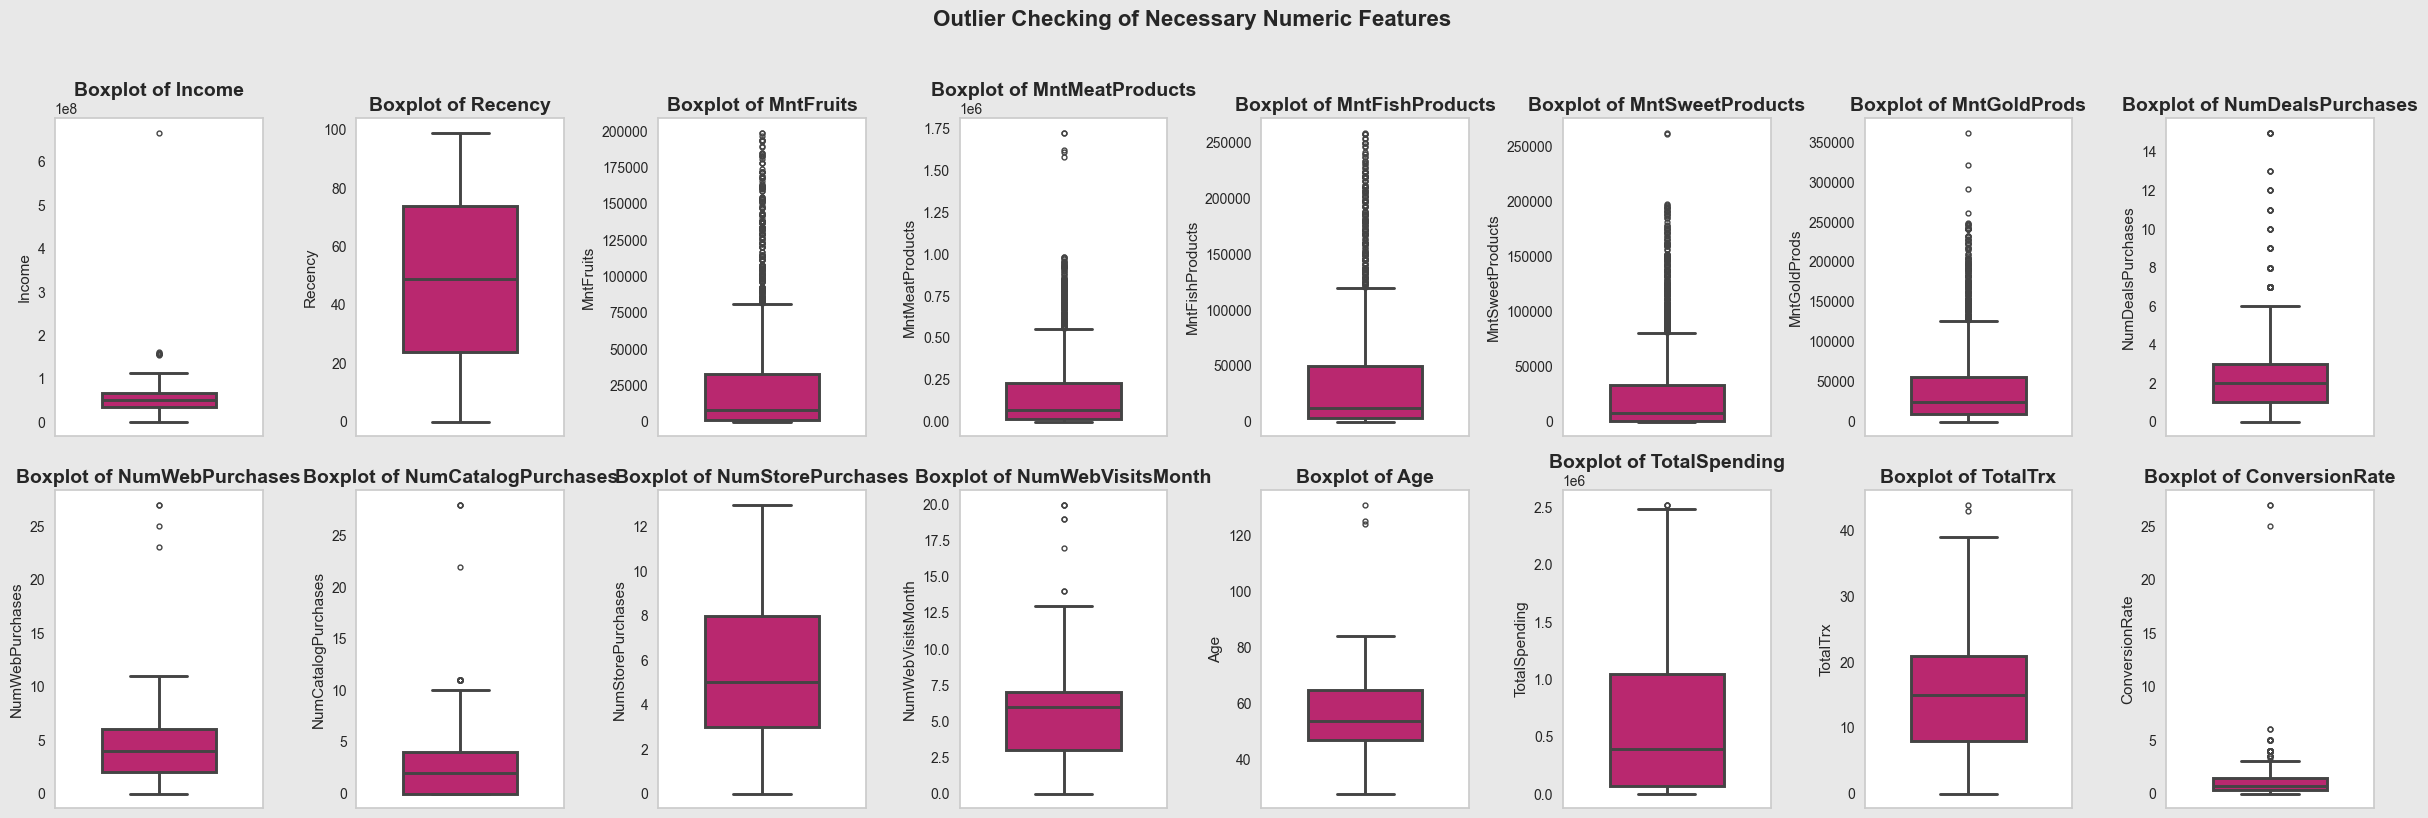

In [29]:
# List of numeric features for exploratory data analysis
numeric_features = [
    'Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 
    'TotalSpending', 'TotalTrx', 'ConversionRate'
]

# Create a subplot grid for boxplots
fig, axes = plt.subplots(2, 8, figsize=(24, 8))

# Set the title and background color for the figure
fig.suptitle('Outlier Checking of Necessary Numeric Features', fontsize=16, fontweight='bold', y=1.02)
fig.set_facecolor('#E8E8E8')

# Loop over each numeric feature and create a boxplot on a separate subplot
for feature, ax in zip(numeric_features, axes.flatten()):
    # Create a boxplot for the current feature
    sns.boxplot(y=dfe[feature], ax=ax, color='#D1106F', linewidth=2.1, width=0.55, fliersize=3.5)
    
    # Set the title for the current subplot
    ax.set_title(f'Boxplot of {feature}', fontsize=14, fontweight='bold', pad=5)
    
    # Remove gridlines from the current subplot
    ax.grid(False)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

In our dataset, we have identified outliers in the following features:

1. `Income`
2. `MntMeatProducts`
3. `MntSweetProducts`
4. `MntGoldProds`
5. `NumDealsPurchases`
6. `NumWebPurchases`
7. `NumCatalogPurchases`
8. `NumWebVisitsMonth`
9. `Age`
10. `TotalTrx`
11. `ConversionRate`

Outliers can significantly skew the results of our data analysis and predictive modeling process. They can be caused by various factors such as measurement errors, data entry errors, or extreme variation in the data.

In this case, we have decided to cap the outliers to the lower/upper bound. This approach involves replacing the extreme values with a specified minimum and maximum value. It is a suitable method when we don't want to lose data, but at the same time, we want to limit the effect of the extreme values.

This method is particularly beneficial for our unsupervised machine learning model, as it can help to improve the performance of the model by reducing the impact of the outliers on the model's learning process.

##### Data Distribution (Numeric)

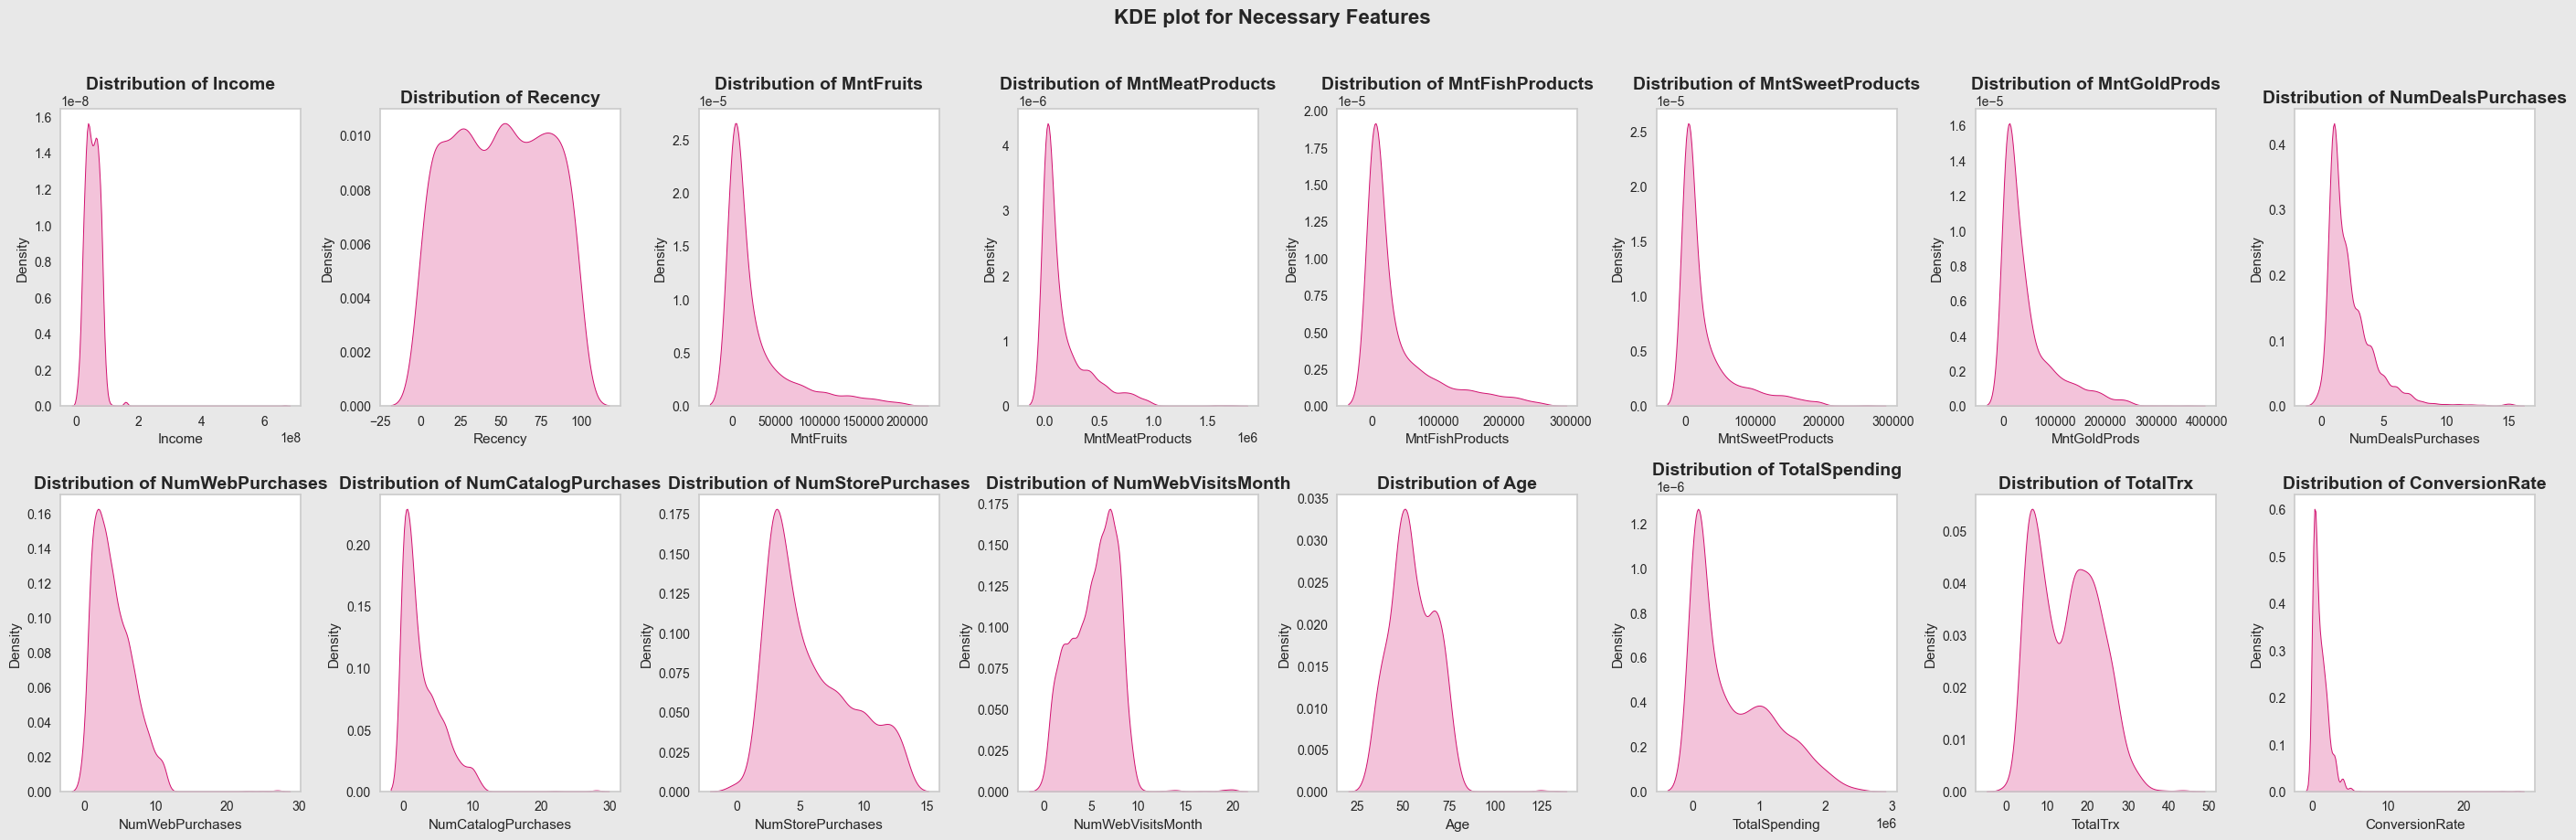

In [31]:
# List of numeric features for exploratory data analysis
numeric_features = [
    'Income', 'Recency', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 
    'TotalSpending', 'TotalTrx', 'ConversionRate'
]

# Create a subplot grid for KDE plots
fig, axes = plt.subplots(2, 8, figsize=(28, 9))

# Set the title and background color for the figure
fig.suptitle('KDE plot for Necessary Features', fontsize=16, fontweight='bold', y=1.02)
fig.set_facecolor('#E8E8E8')

# Loop over each numeric feature and create a KDE plot on a separate subplot
for feature, ax in zip(numeric_features, axes.flatten()):
    # Create a KDE plot for the current feature
    sns.kdeplot(x=dfe[feature], ax=ax, color='#D1106F', linewidth=0.7, fill=True)
    
    # Set the title for the current subplot
    ax.set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold', pad=5)
    
    # Remove gridlines from the current subplot
    ax.grid(False)

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

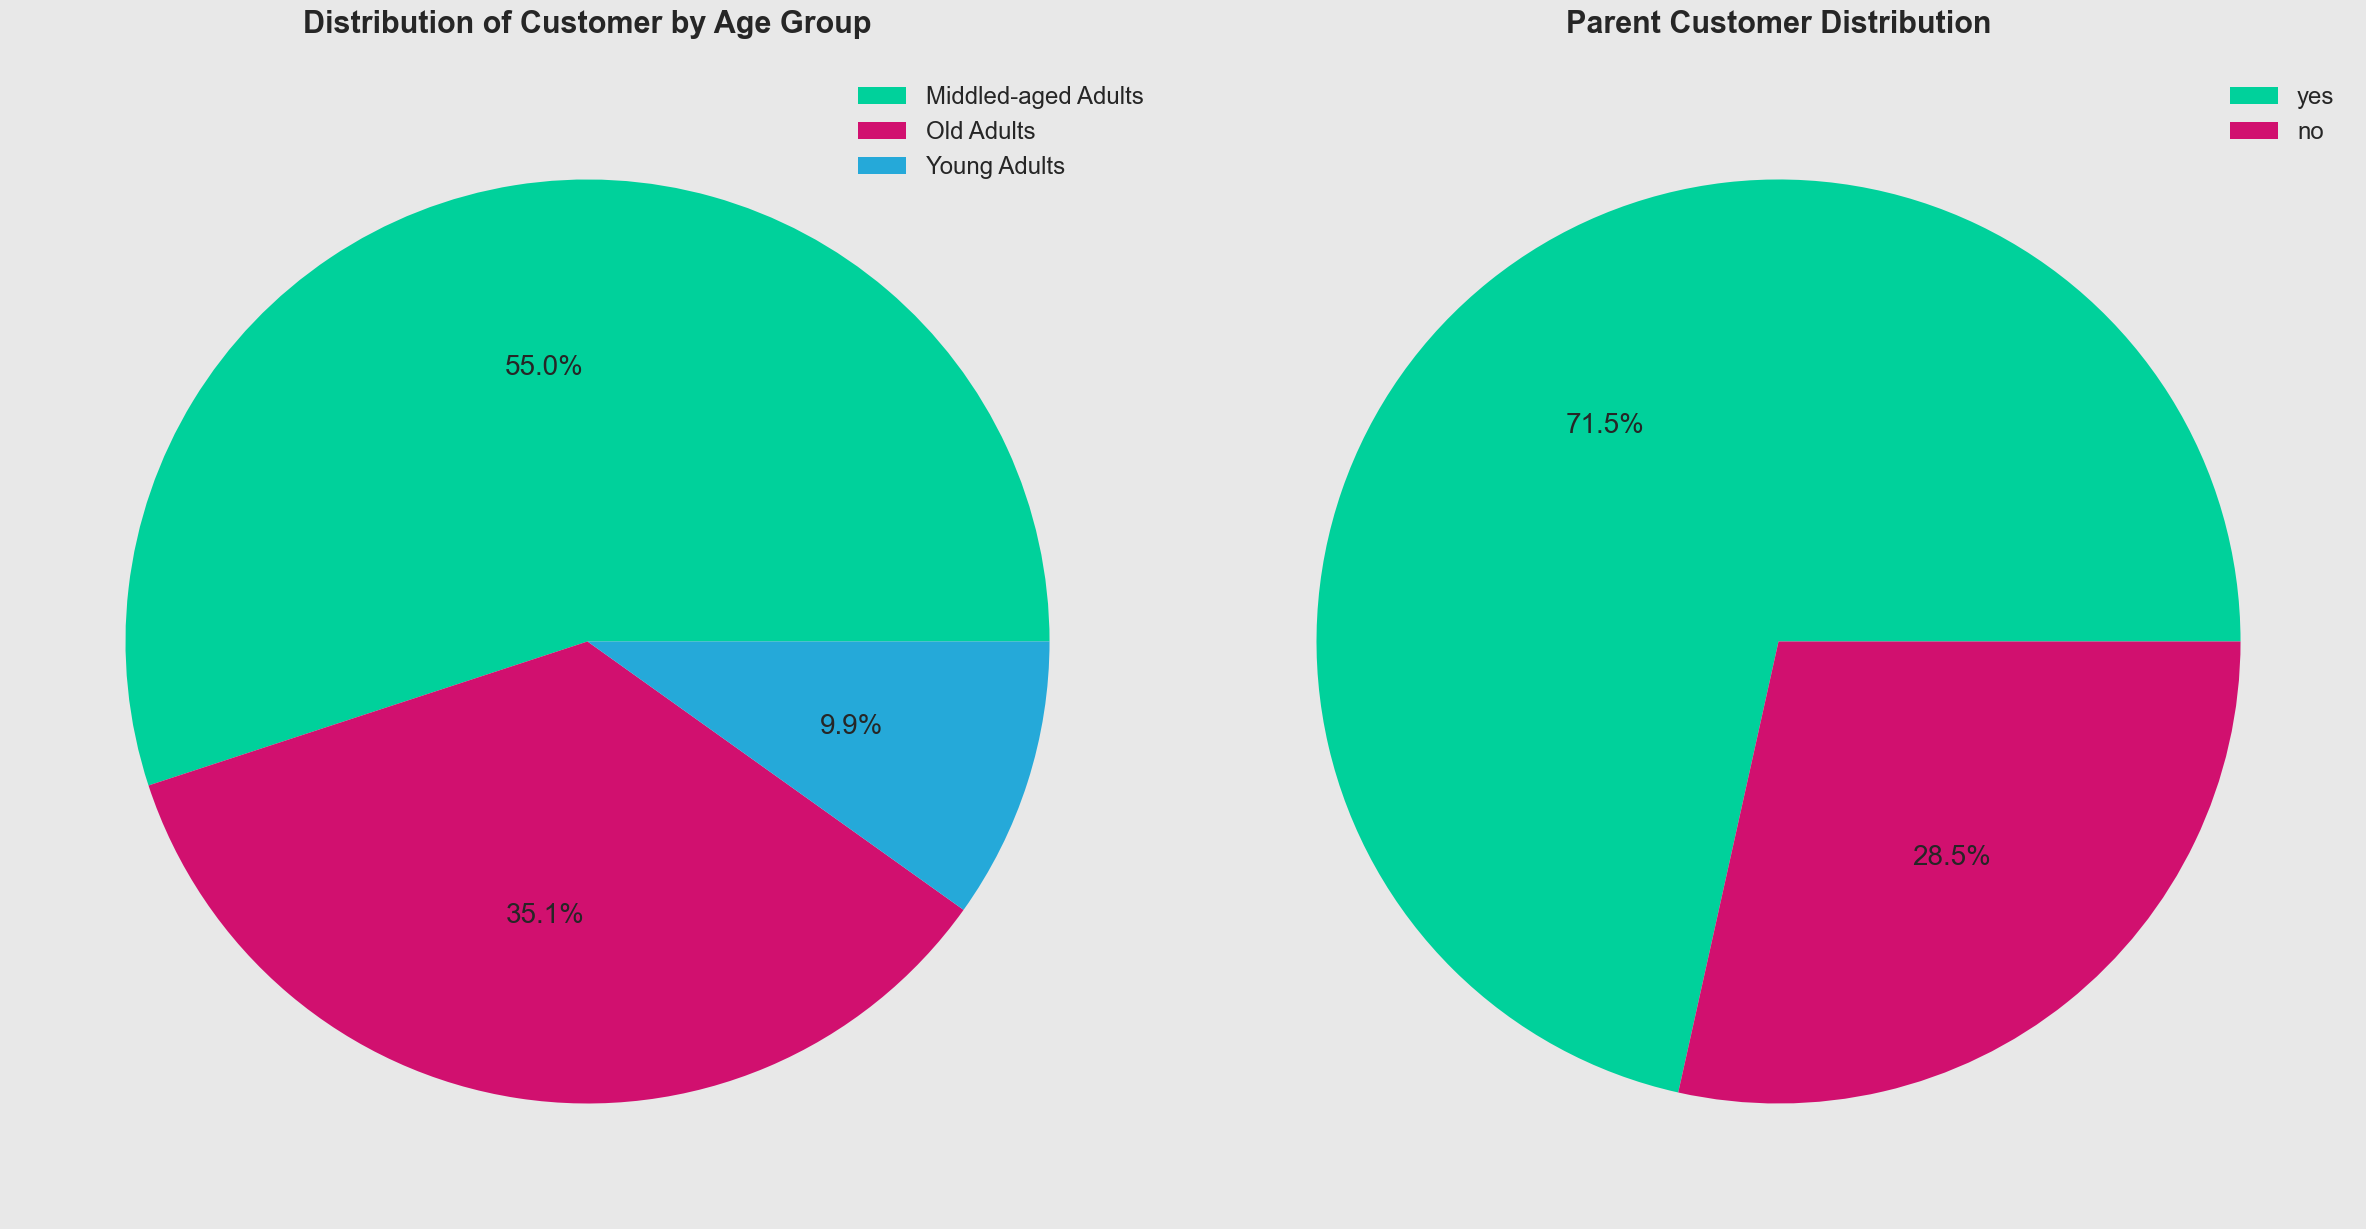

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(24,12))
fig.set_facecolor('#E8E8E8')

# Get counts of each age group
age_counts = dfe['AgeGroup'].value_counts()
palt = ['#00D19B','#D1106F' ,'#25A9D9']

# Create pie chart
patches, texts, autotexts = axs[0].pie(age_counts, colors=palt, autopct='%1.1f%%', textprops={'size': 20})

# Legend
axs[0].legend(patches, age_counts.index, loc="best", fontsize='x-large')
axs[0].set_title("Distribution of Customer by Age Group", fontsize=22, fontweight='bold', y=1.02)

# Get counts of each age group
parent_counts = dfe['Parent'].value_counts()
palt = ['#00D19B','#D1106F']

# Create pie chart
patches, texts, autotexts = axs[1].pie(parent_counts, colors=palt, autopct='%1.1f%%', textprops={'size':20})

# Add legend
axs[1].legend(patches, parent_counts.index, loc="best", fontsize='x-large')
axs[1].set_title("Parent Customer Distribution", fontsize=22, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()




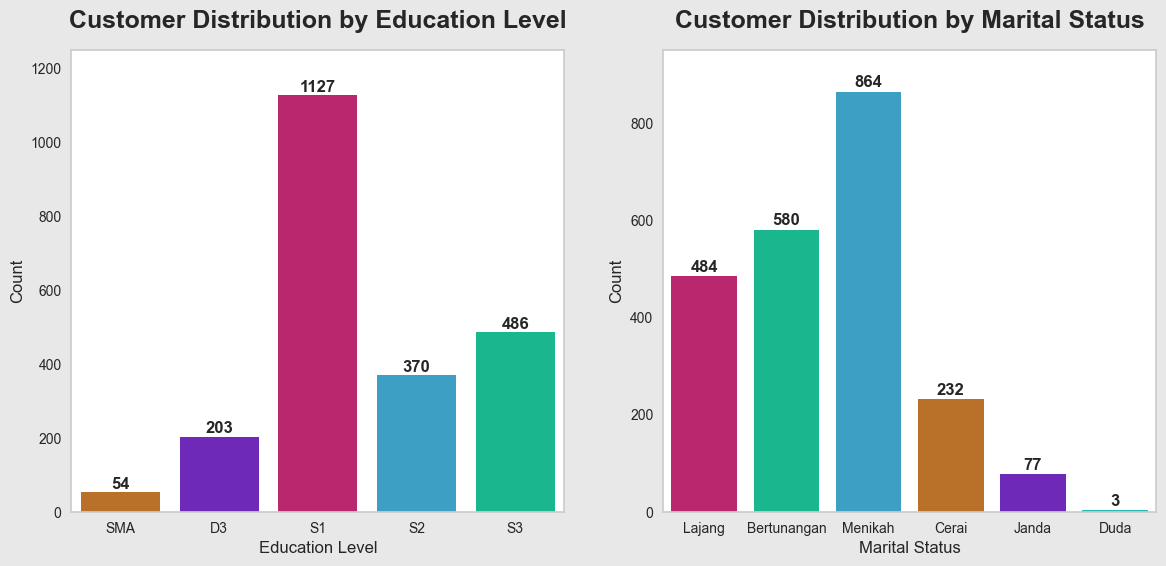

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor='#E8E8E8')

def annotate_countplot(countplot):
    for p in countplot.patches:
        height = p.get_height()
        countplot.text(p.get_x()+p.get_width()/2.,
                     height + 10,
                     '{:1.0f}'.format(height),
                        ha="center",
                        fontweight='bold')

palt = ['#D1106F','#00D19B' ,'#25A9D9', '#D16F11', '#6F11D1']
edu_order = ['SMA', 'D3', 'S1', 'S2', 'S3']
countplot = sns.countplot(data=dfe, x='Education', hue='Education', order=edu_order, palette=palt, ax=axs[0], legend=False)
annotate_countplot(countplot)
axs[0].set_ylim(0, 1250)
axs[0].set_title("Customer Distribution by Education Level", fontsize=18, fontweight='bold', y=1.03)
axs[0].set_xlabel('Education Level', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].grid(False)


palt = ['#D1106F','#00D19B' ,'#25A9D9', '#D16F11', '#6F11D1', '#11D1D1']
countplot = sns.countplot(data=dfe, x='Marital_Status', hue='Marital_Status', palette=palt, ax=axs[1], legend=False)
annotate_countplot(countplot)
axs[1].set_ylim(0, 950)
axs[1].set_title("Customer Distribution by Marital Status", fontsize=18, fontweight='bold', y=1.03)
axs[1].set_xlabel('Marital Status', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].grid(False)

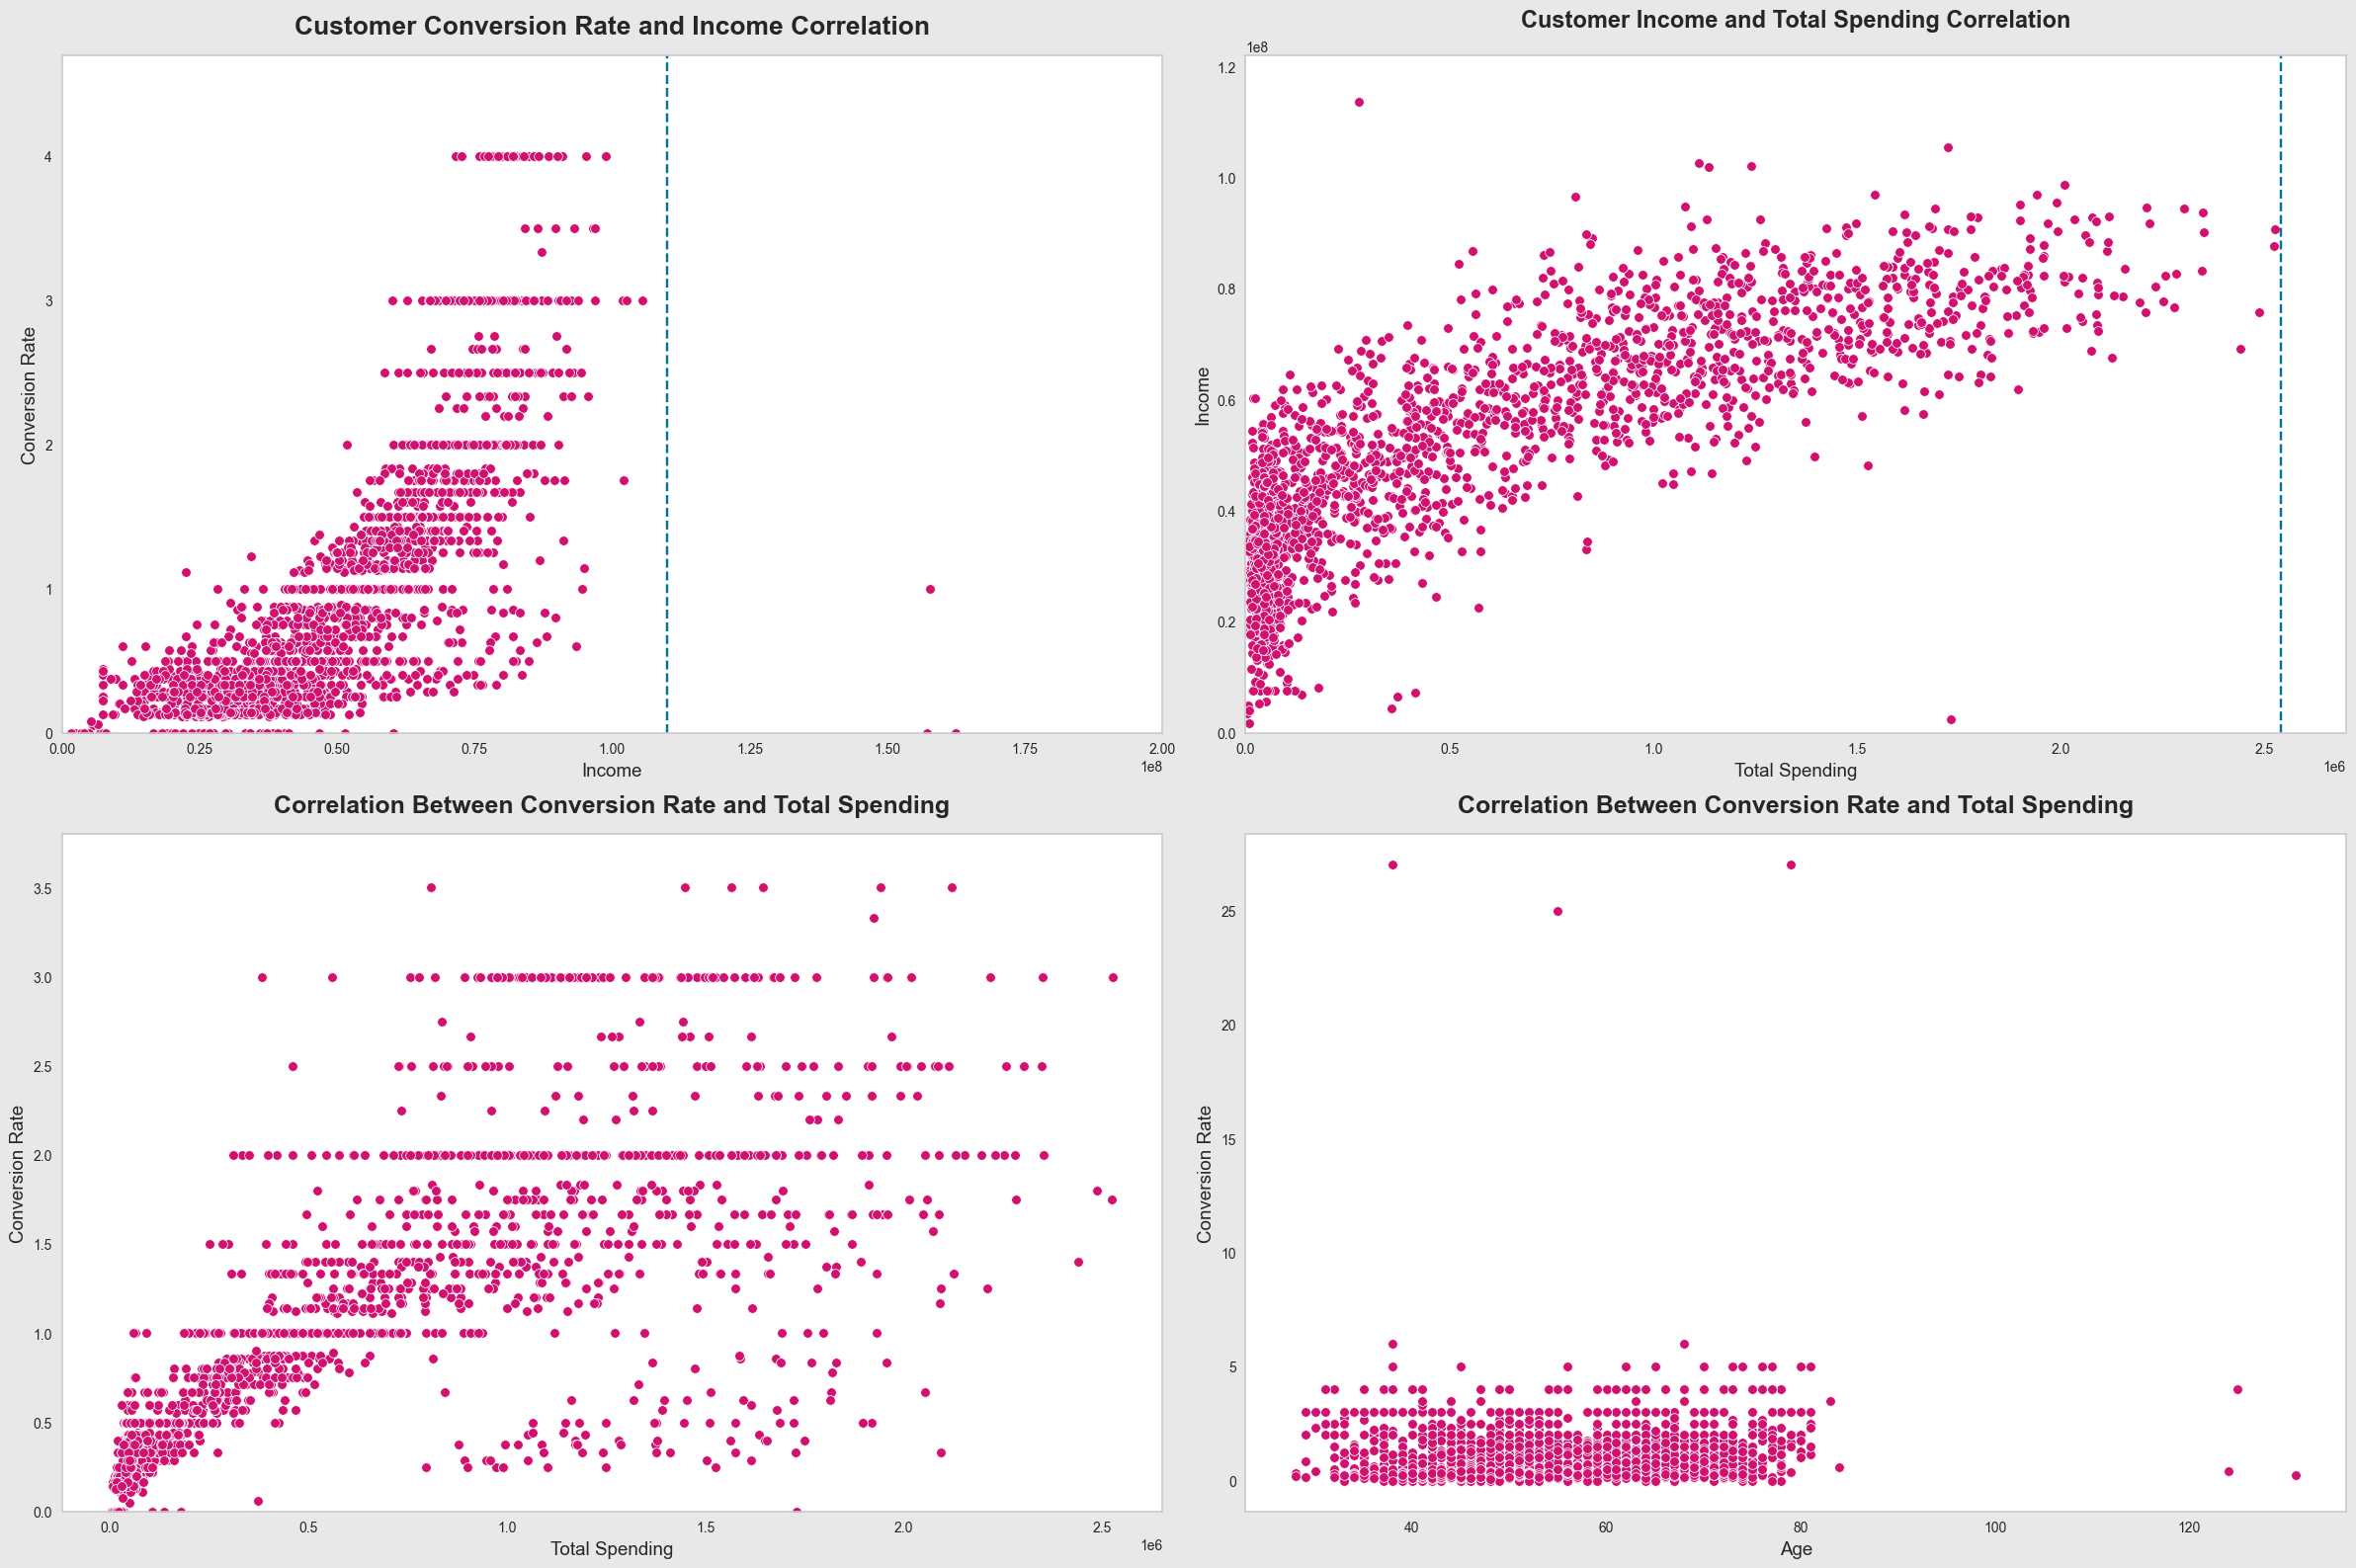

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(24,16))
fig.set_facecolor('#E8E8E8')
# Plot 1
sns.scatterplot(x='Income', y='ConversionRate', data=dfe, color='#D1106F', ax=axs[0, 0])
axs[0, 0].set_xlim(0, 200000000)
axs[0, 0].set_ylim(0, 4.7)
axs[0, 0].axvline(x=110000000, color='b', linestyle='--')
axs[0, 0].set_title("Customer Conversion Rate and Income Correlation", fontsize=19, fontweight='bold', y=1.02)
axs[0, 0].set_xlabel('Income', fontsize=13.5)
axs[0, 0].set_ylabel('Conversion Rate', fontsize=13.5)
axs[0, 0].grid(False)

# Plot 2
sns.scatterplot(x='TotalSpending', y='Income', data=dfe, color='#D1106F', ax=axs[0, 1])
axs[0, 1].set_ylim(0, 122000000)
axs[0, 1].set_xlim(0, 2700000)
axs[0, 1].axvline(x=2540000, color='b', linestyle='--')
axs[0, 1].set_title('Customer Income and Total Spending Correlation', fontsize=17, fontweight='bold', y=1.03)
axs[0, 1].set_xlabel('Total Spending', fontsize=13.5)
axs[0, 1].set_ylabel('Income', fontsize=13.5)
axs[0, 1].grid(False)

# Plot 3
sns.scatterplot(x='TotalSpending', y='ConversionRate', data=dfe, color='#D1106F', ax=axs[1, 0])
axs[1, 0].set_ylim(0, 3.8)
axs[1, 0].set_title('Correlation Between Conversion Rate and Total Spending', fontsize=18, fontweight='bold', y=1.02)
axs[1, 0].set_xlabel('Total Spending', fontsize=13.5)
axs[1, 0].set_ylabel('Conversion Rate', fontsize=13.5)
axs[1, 0].grid(False)


# Plot 4
sns.scatterplot(x='Age', y='ConversionRate', data=dfe, color='#D1106F', ax=axs[1, 1])
# axs[1, 1].set_ylim(0, 3.8)
axs[1, 1].set_title('Correlation Between Conversion Rate and Total Spending', fontsize=18, fontweight='bold', y=1.02)
axs[1, 1].set_xlabel('Age', fontsize=13.5)
axs[1, 1].set_ylabel('Conversion Rate', fontsize=13.5)
axs[1, 1].grid(False)

plt.tight_layout()
plt.show()

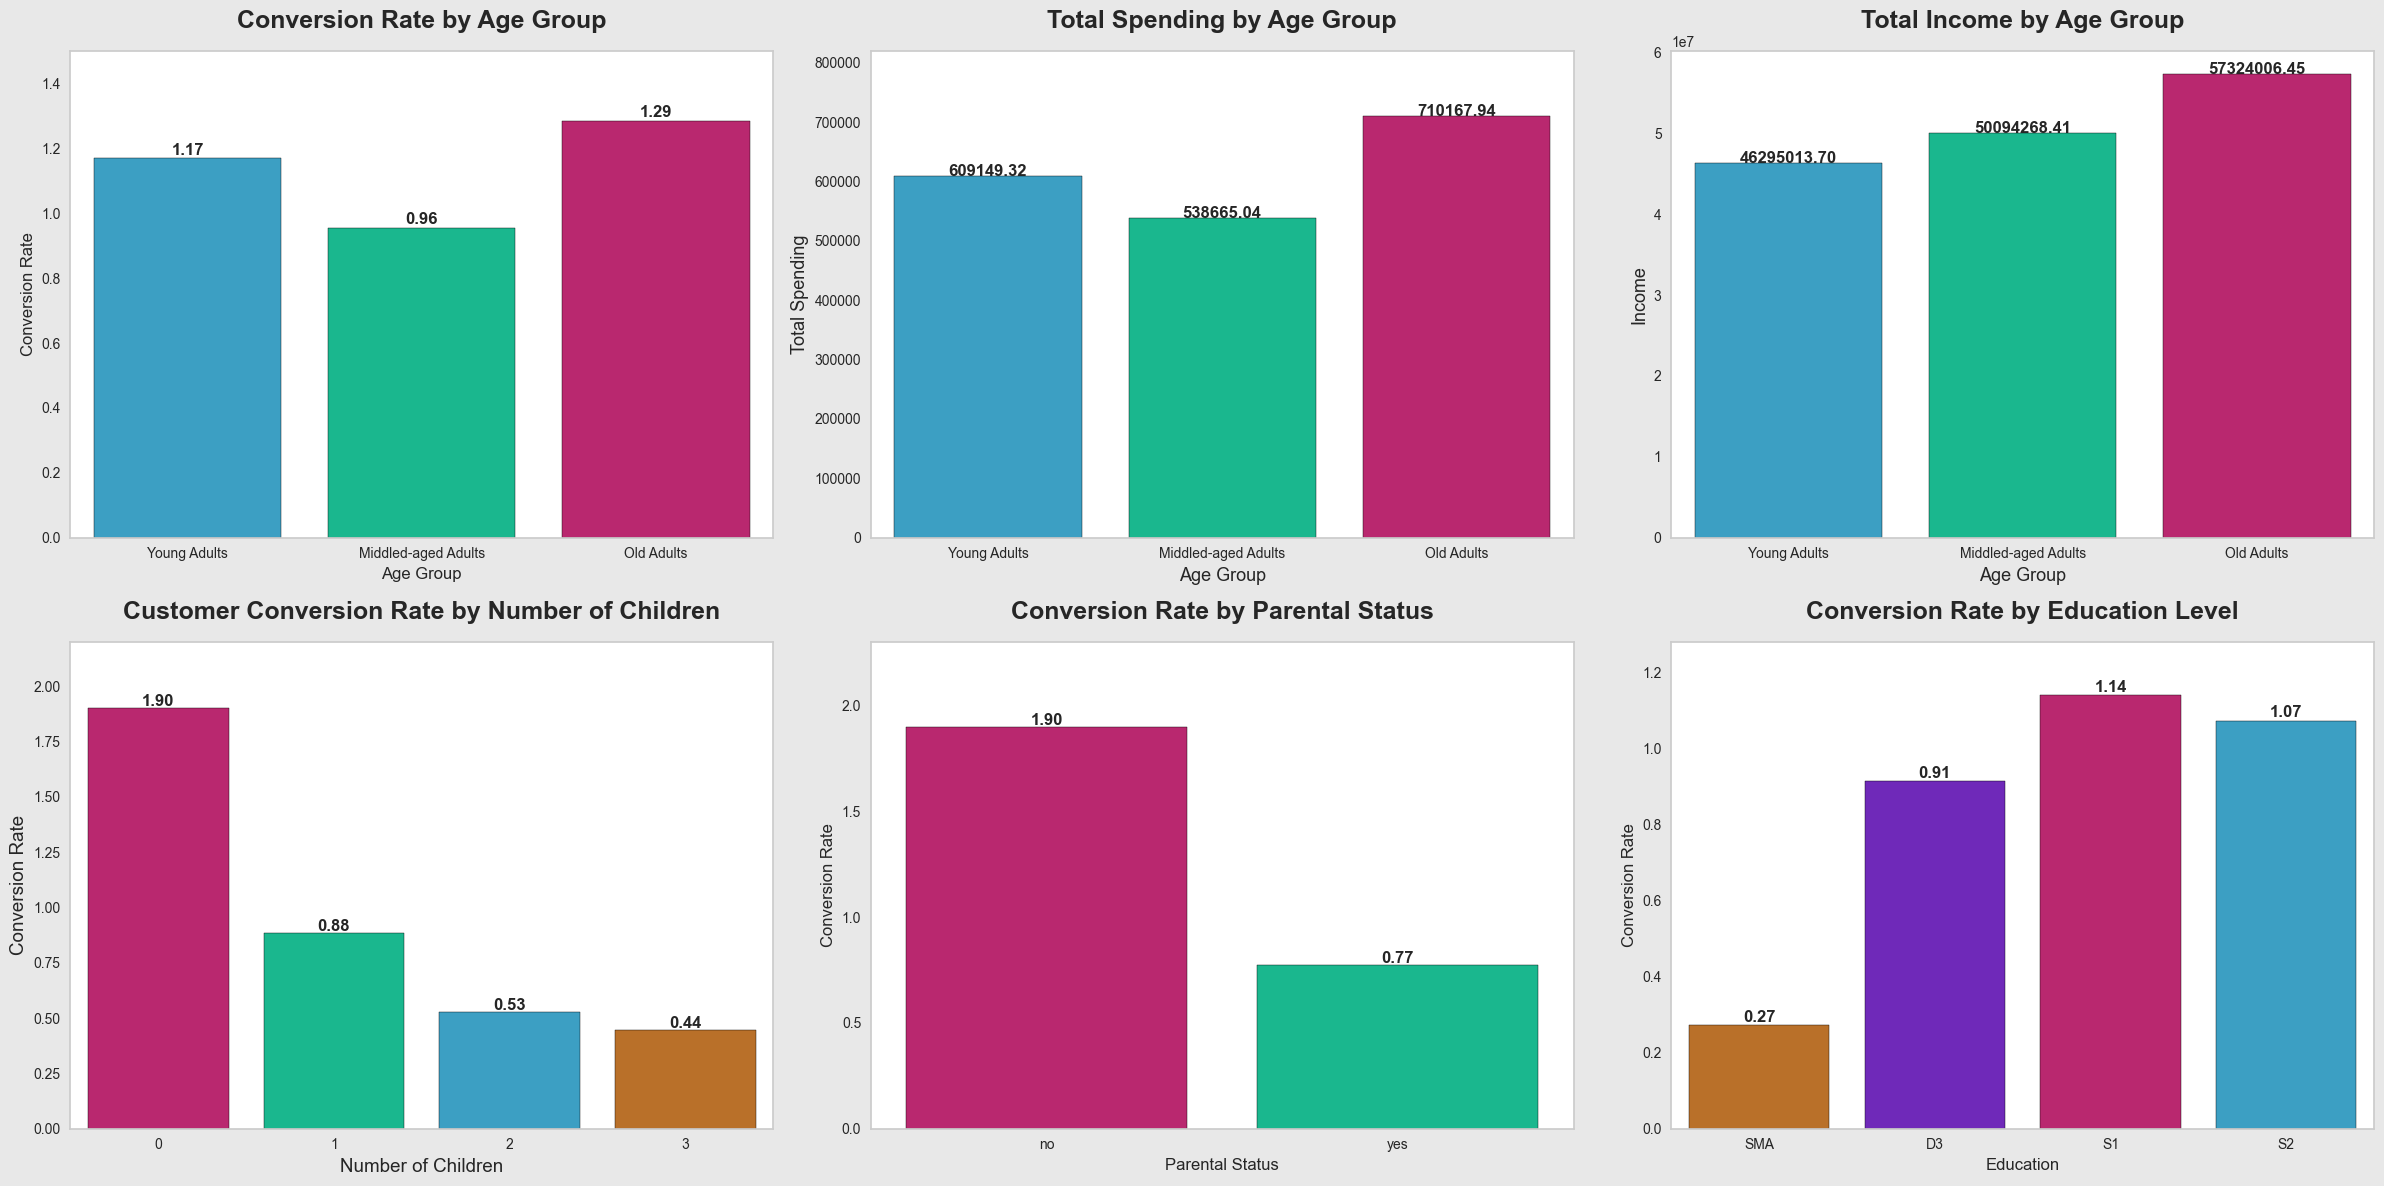

In [9]:
# Create a 3x2 grid of subplots with a specific size and background color
fig, axs = plt.subplots(2, 3, figsize=(24, 12), facecolor='#E8E8E8')
# Define the color palette and order of age groups
palt = ['#D1106F','#00D19B' ,'#25A9D9']
age_order = ['Young Adults', 'Middled-aged Adults', 'Old Adults']

# Define a function to annotate the bars in a bar plot with their height values
def annotate_barplot(barplot):
    for p in barplot.patches:
        height = p.get_height()
        barplot.text(p.get_x()+p.get_width()/2.,
                     height + 0.01,
                     '{:1.2f}'.format(height),
                        ha="center",
                        fontweight='bold')

# Conversion Rate Vs Age Group
barplot = sns.barplot(
    data=dfe, 
    x='AgeGroup', 
    y='ConversionRate', 
    hue='AgeGroup',
    order=age_order,
    legend=False,
    palette=palt,
    errorbar=None,
    edgecolor='black',
    ax=axs[0, 0]
)
annotate_barplot(barplot)
axs[0, 0].set_ylim(0, 1.5)
axs[0, 0].set_title("Conversion Rate by Age Group", fontsize=18, fontweight='bold', y=1.03)
axs[0, 0].set_xlabel('Age Group', fontsize=12)
axs[0, 0].set_ylabel('Conversion Rate', fontsize=12)
axs[0, 0].grid(False)

# Total Spending By Age Group
barplot = sns.barplot(
    data=dfe, 
    x='AgeGroup', 
    y='TotalSpending',
    hue='AgeGroup', 
    order=age_order, 
    legend=False,
    palette=palt,
    errorbar=None,
    edgecolor='black',
    ax=axs[0, 1]
)
annotate_barplot(barplot)
axs[0, 1].set_ylim(0, 820000)
axs[0, 1].set_title("Total Spending by Age Group", fontsize=18, fontweight='bold', y=1.03)
axs[0, 1].set_xlabel('Age Group', fontsize=13)
axs[0, 1].set_ylabel('Total Spending', fontsize=13)
axs[0, 1].grid(False)

# Total Spending By Age Group
barplot = sns.barplot(
    data=dfe,
    x='AgeGroup',
    y='Income',
    hue='AgeGroup',
    order=age_order,
    legend=False,
    palette=palt,
    errorbar=None,
    edgecolor='black',
    ax=axs[0, 2]
)
annotate_barplot(barplot)
axs[0, 2].set_title("Total Income by Age Group", fontsize=18, fontweight='bold', y=1.03)
axs[0, 2].set_xlabel('Age Group', fontsize=13)
axs[0, 2].set_ylabel('Income', fontsize=13)
axs[0, 2].grid(False)

# Conversion Rate Number of Children
palt = ['#D1106F','#00D19B' ,'#25A9D9', '#D16F11']
barplot = sns.barplot(
    x='NumChild',
    y='ConversionRate',
    hue='NumChild',
    legend=False, data=dfe,
    palette=palt,
    errorbar=None,
    edgecolor='black',
    ax=axs[1, 0])
annotate_barplot(barplot)
axs[1, 0].set_ylim(0, 2.2)
axs[1, 0].set_title("Customer Conversion Rate by Number of Children", fontsize=18, fontweight='bold', y=1.03)
axs[1, 0].set_xlabel('Number of Children', fontsize=13.5)
axs[1, 0].set_ylabel('Conversion Rate', fontsize=13.5)
axs[1, 0].grid(False)

# Conversion Rate by Parental Status
palt = ['#D1106F','#00D19B']
barplot = sns.barplot(
    x='Parent',
    y='ConversionRate',
    hue='Parent',
    data=dfe,
    legend=False,
    palette=palt,
    errorbar=None,
    edgecolor='black',
    ax=axs[1, 1]
)
annotate_barplot(barplot)
axs[1, 1].set_ylim(0, 2.3)
axs[1, 1].set_title('Conversion Rate by Parental Status', fontsize=18, fontweight='bold', y=1.03)
axs[1, 1].set_xlabel('Parental Status', fontsize=12)
axs[1, 1].set_ylabel('Conversion Rate', fontsize=12)
axs[1, 1].grid(False)
# Conversion Rate by education
palt = ['#D1106F','#00D19B' ,'#25A9D9', '#D16F11', '#6F11D1']
ed_order = ['SMA', 'D3', 'S1', 'S2', 'S2']
barplot = sns.barplot(
    x='Education',
    y='ConversionRate',
    hue='Education',
    data=dfe,
    order=ed_order,
    legend=False,
    palette=palt,
    errorbar=None,
    edgecolor='black',
    ax=axs[1, 2]
)
annotate_barplot(barplot)
axs[1, 2].set_ylim(0, 1.28)
axs[1, 2].set_title('Conversion Rate by Education Level', fontsize=18, fontweight='bold', y=1.03)
axs[1, 2].set_xlabel('Education', fontsize=12)
axs[1, 2].set_ylabel('Conversion Rate', fontsize=12)
axs[1, 2].grid(False)

plt.tight_layout()
plt.show()

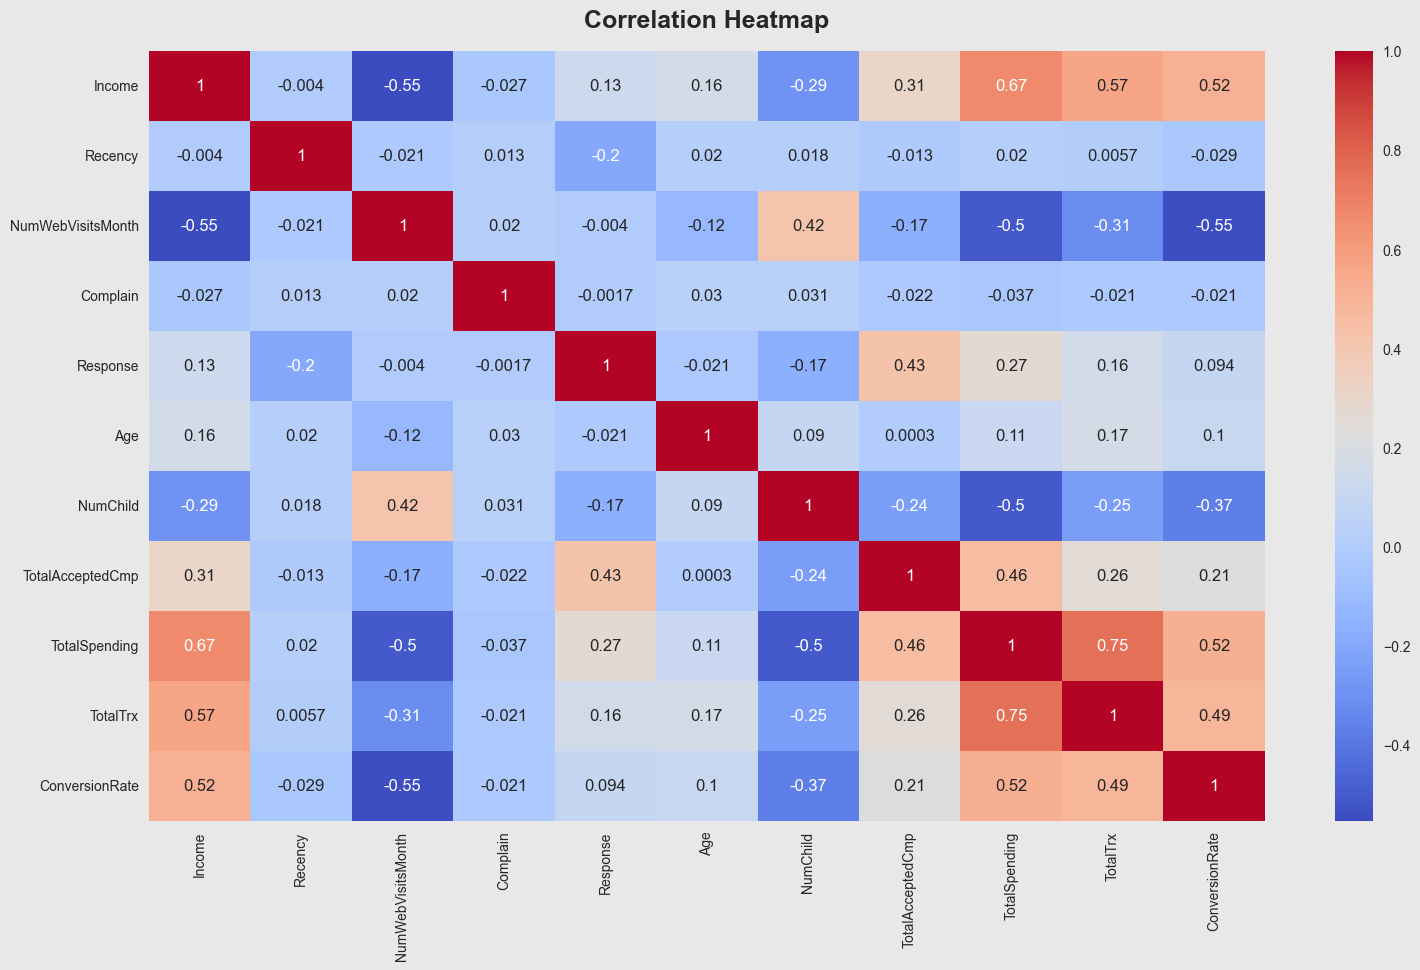

In [10]:
num = ['Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'NumChild', 'TotalAcceptedCmp',
       'TotalSpending', 'TotalTrx', 'ConversionRate']
plt.figure(figsize=(18,10), facecolor='#E8E8E8')
sns.heatmap(dfe[num].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', y=1.02)
plt.show()

## Task 2 : Data Cleaning & Preprocessing
Goals : Preparing raw data into clean data ready to be processed by machine learning<br><br>
Objective : 
- Handle Missing Values
- Handle Duplicate Values
- Handle Infinity values 
- Feature Selection 
- Feature Encoding
- Standarization

#### Handle missing values

In [11]:
# make a copy of previous dataframe for next step (Data Preprocessing)
dfp = dfe.copy()

# Print missing values
missing_col = dfp.isna().sum()
display_missing_col = missing_col[missing_col > 0]
print(f'Missing Values : \n \n{display_missing_col}')

Missing Values : 
 
Income            24
ConversionRate     5
dtype: int64


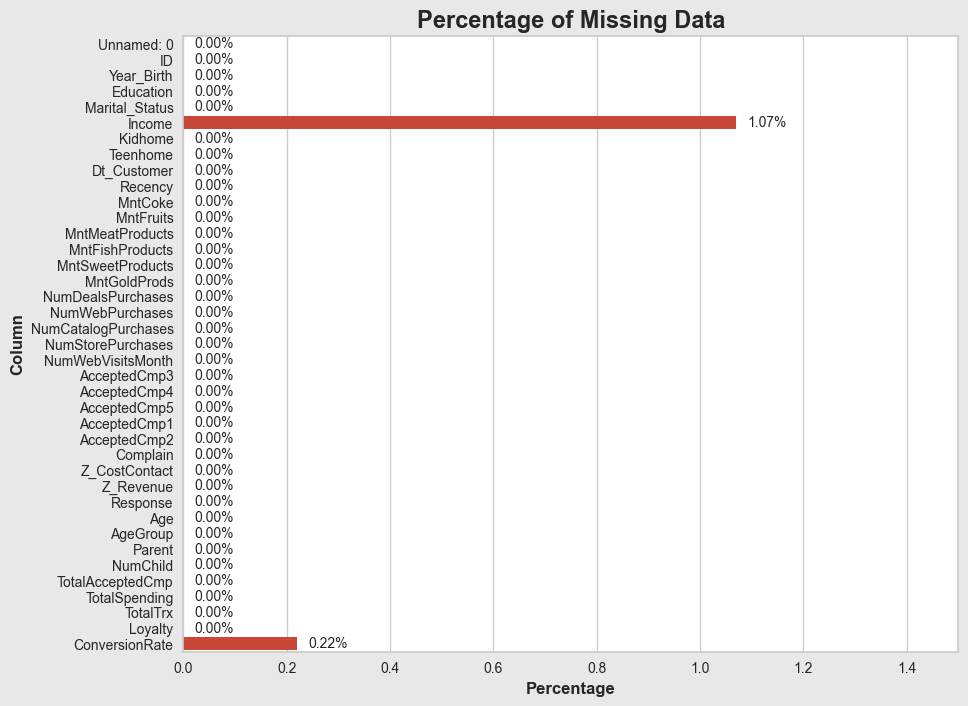

In [12]:
missing = dfp.isnull().sum()*100 / len(dfp)

percentage_missing = pd.DataFrame({'column':dfp.columns,
                                   'missing_percentage %':missing.values})
percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
percentage_missig = percentage_missing.sort_values('missing_percentage %', ascending=False)
percentage_missing = percentage_missing.reset_index()
percentage_missing = percentage_missing.drop('index', axis=1)

plt.figure(figsize=(10,8), facecolor='#E8E8E8')
ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
for p in ax.patches:
    ax.annotate('%.2f' % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(8,0), textcoords='offset points', ha='left', va='center', fontsize=10)
plt.title('Percentage of Missing Data', fontsize=17, fontweight='bold')
plt.ylabel('Column', fontsize=12, fontweight='bold')
plt.xlabel('Percentage', fontsize=12, fontweight='bold')
plt.xlim(0,1.5)
plt.show()

In [13]:
missing_cr = dfp[['NumWebPurchases', 'NumWebVisitsMonth', 'ConversionRate']]
missing_crdf = missing_cr[missing_cr.isna().any(axis=1)]

print(f"Highlighted Missing values : \n")
display(missing_crdf)
print('*Conversion Rate not missing at Random*')

Highlighted Missing values : 



,NumWebPurchases,NumWebVisitsMonth,ConversionRate
164,0,0,NaN
655,0,0,NaN
687,0,0,NaN
2132,0,0,NaN
2228,0,0,NaN


*Conversion Rate not missing at Random*


In [14]:
# print total null on income and conversion rate
total_null_income = dfp['Income'].isna().sum()
total_null_conrate = dfp['ConversionRate'].isna().sum()
print(f"Total Missing Values on Income Column = {total_null_income}")
print(f"Total Missing Values on Conversion Rate Column = {total_null_conrate}")

# print median income
median_income = dfp['Income'].median()
print(f"\nIncome Median to fill the missing value: {median_income}")

# handle missing values with fill and drop method
dfp['Income'].fillna(dfp['Income'].median(), inplace=True)
dfp.dropna(subset=['ConversionRate'], inplace=True)

# checking missing values if still exist
nonull_income = dfp['Income'].isna().sum()
nonull_conrate = dfp['ConversionRate'].isna().sum()
print(f"\nMissing Values on Income Column after handling = {nonull_income}")
print(f"Missing Values on Conversion Rate Column after handling = {nonull_conrate}")

Total Missing Values on Income Column = 24
Total Missing Values on Conversion Rate Column = 5

Income Median to fill the missing value: 51381500.0

Missing Values on Income Column after handling = 0
Missing Values on Conversion Rate Column after handling = 0


#### No Duplicates

In [15]:
total_duplicate = dfp.duplicated().sum()
print(f"Total Duplicated Data = {total_duplicate}")

Total Duplicated Data = 0


#### Fix the Infinity Value On Conversion Rate Features

In [16]:
# Print count Infiinity values in dataframe
count_inf = dfp.map(lambda x: isinstance(x, float) and x == float('inf')).sum().sum()
print(f"Count of Infinity Values :\nIt Contains {str(count_inf)} Infinite values in dataframe")

# print column where infinity values exist
col_inf = dfp.columns[dfp.map(lambda x: isinstance(x, float) and x == float('inf')).any()]
print("\nColumns where Infinity values exist:")
print(", ".join(col_inf))


Count of Infinity Values :
It Contains 6 Infinite values in dataframe

Columns where Infinity values exist:
ConversionRate


In [17]:
# Replace infinity values with NaN
dfp.replace([np.inf, -np.inf], np.nan, inplace=True)

print(f"Dataframe Entries before dropping infinity values {len(dfp)}")

# Drop infinity value as nan value
dfp.dropna(inplace=True)

print(f"\nDataframe Entries After dropping infinity values {len(dfp)}")

no_inf = dfp.map(lambda x: isinstance(x, float) and x == float('inf')).sum().sum()
print(f"\nChecking if inifinity values still exist in dataframe : {str(no_inf)}")

Dataframe Entries before dropping infinity values 2235

Dataframe Entries After dropping infinity values 2229

Checking if inifinity values still exist in dataframe : 0


#### Handle Outliers

In [18]:
def cap_outliers(data, columns):
    result = data.copy()
    for col in columns:
        Q1 = result[col].quantile(0.25)
        Q3 = result[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result[col] = np.where(result[col] < lower_bound, lower_bound, result[col])
        result[col] = np.where(result[col] > upper_bound, upper_bound, result[col])
    return result

outliers = ['Income', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'Age', 'TotalTrx', 'ConversionRate'] 

dfp_noutlier = cap_outliers(dfp, outliers)

#### Feature Selection

In [19]:
dfp_noutlier = dfp_noutlier.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

#### Feature Encoding
Features to label Encode :<br>
- Education
- Age Group

Features to One Hot Encode: <br>
- Marital_Status
- Parent

In [20]:
# Label Encding
# Initialize Label Encoder as le
le = LabelEncoder()

dfp_noutlier['Education'] = le.fit_transform(dfp_noutlier['Education'])
dfp_noutlier['AgeGroup'] = le.fit_transform(dfp_noutlier['AgeGroup'])


# One hot Encoding
ms_encoded = pd.get_dummies(dfp_noutlier['Marital_Status'], prefix='Status').astype(int)
dfp_noutlier = pd.concat([dfp_noutlier, ms_encoded], axis=1)

parent_encoded = pd.get_dummies(dfp_noutlier['Parent'], prefix='Parent').astype(int)
dfp_noutlier = pd.concat([dfp_noutlier, parent_encoded], axis=1)

# drop marital status and parent column after encoded(redundant)
dfp_noutlier.drop(columns=['Marital_Status', 'Parent'], inplace=True)

print('\ndataframe after feature encoding :')
display(dfp_noutlier.head())


dataframe after feature encoding :


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup,NumChild,TotalAcceptedCmp,TotalSpending,TotalTrx,Loyalty,ConversionRate,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah,Parent_no,Parent_yes
0,1,58138000.0,0,0,58,635000,88000,546000.0,172000,81000.0,88000.0,3.0,8.0,10.0,4,7.0,0,0,0,0,0,0,1,67.0,1,0,0,1617000,25.0,136,1.142857,0,0,0,0,1,0,1,0
1,1,46344000.0,1,1,38,11000,1000,6000.0,2000,1000.0,6000.0,2.0,1.0,1.0,2,5.0,0,0,0,0,0,0,0,70.0,1,2,0,27000,6.0,118,0.200000,0,0,0,0,1,0,0,1
2,1,71613000.0,0,0,26,426000,49000,127000.0,111000,21000.0,42000.0,1.0,8.0,2.0,10,4.0,0,0,0,0,0,0,0,59.0,0,0,0,776000,21.0,125,2.000000,1,0,0,0,0,0,1,0
3,1,26646000.0,1,0,26,11000,4000,20000.0,10000,3000.0,5000.0,2.0,2.0,0.0,4,6.0,0,0,0,0,0,0,0,40.0,0,1,0,53000,8.0,119,0.333333,1,0,0,0,0,0,0,1
4,3,58293000.0,1,0,94,173000,43000,118000.0,46000,27000.0,15000.0,5.0,5.0,3.0,6,5.0,0,0,0,0,0,0,0,43.0,0,1,0,422000,19.0,120,1.000000,0,0,0,0,0,1,0,1


#### Standarization

In [21]:
# Inititalize standard scaler as scaler
scaler = StandardScaler()
# Standardize the data
scaled_data = scaler.fit_transform(dfp_noutlier)

# new dataframe with scaled data
scaled_dfp = pd.DataFrame(scaled_data, columns=dfp_noutlier.columns, index=dfp_noutlier.index)

print('\ndataframe after scaled(standarized) :')
scaled_dfp.head()


dataframe after scaled(standarized) :


,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup,NumChild,TotalAcceptedCmp,TotalSpending,TotalTrx,Loyalty,ConversionRate,Status_Bertunangan,Status_Cerai,Status_Duda,Status_Janda,Status_Lajang,Status_Menikah,Parent_no,Parent_yes
0,-0.579148,0.311066,-0.828645,-0.933088,0.308958,0.981406,1.556014,2.236394,2.475009,2.141847,1.215781,0.509046,1.488917,2.712614,-0.554358,0.720677,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,2.381943,1.008372,0.675860,-1.270492,-0.439754,1.684942,1.332007,1.497314,0.124323,-0.590994,-0.340023,-0.036711,-0.187882,1.903807,-0.792588,1.594904,-1.594904
1,-0.579148,-0.258284,1.027686,0.905863,-0.382267,-0.870552,-0.636803,-0.810024,-0.649633,-0.760455,-0.839842,-0.143060,-1.163392,-0.592442,-1.172036,-0.139965,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,-0.419825,1.263285,0.675860,1.393597,-0.439754,-0.958952,-1.159626,-1.218319,-0.955091,-0.590994,-0.340023,-0.036711,-0.187882,1.903807,-0.792588,-0.626997,0.626997
2,-0.579148,0.961566,-0.828645,-0.933088,-0.797002,0.361119,0.573027,-0.127401,1.353814,-0.034879,0.062626,-0.795165,1.488917,-0.225214,1.298676,-0.570286,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,-0.419825,0.328601,-0.821647,-1.270492,-0.439754,0.286505,0.807453,-0.162239,1.105609,1.692065,-0.340023,-0.036711,-0.187882,-0.525263,-0.792588,1.594904,-1.594904
3,-0.579148,-1.209196,1.027686,-0.933088,-0.797002,-0.870552,-0.561188,-0.731043,-0.502591,-0.687897,-0.864911,-0.143060,-0.784491,-0.959671,-0.554358,0.290356,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,-0.419825,-1.285853,-0.821647,0.061553,-0.439754,-0.915718,-0.897349,-1.067451,-0.802447,1.692065,-0.340023,-0.036711,-0.187882,-0.525263,-0.792588,-0.626997,0.626997
4,1.420729,0.318549,1.027686,-0.933088,1.553164,-0.389755,0.421799,-0.178175,0.159098,0.182794,-0.614225,1.813258,0.352213,0.142015,0.063320,-0.139965,-0.280885,-0.283664,-0.280885,-0.262802,-0.116801,-0.097524,-0.419825,-1.030939,-0.821647,0.061553,-0.439754,-0.302135,0.545175,-0.916582,-0.039224,-0.590994,-0.340023,-0.036711,-0.187882,-0.525263,1.261690,-0.626997,0.626997


## Task 3 : Modelling
Goals : Group customers into several clusters<br><br>
Objective : 
Apply the k-means clustering algorithm to the existing dataset, choose the correct number of clusters by looking at the elbow method, and evaluate using the silhouette score.

### PCA 1st

In [22]:
pca = PCA(n_components=2)
dfpca = pd.DataFrame(pca.fit_transform(scaled_dfp), index=dfp_noutlier.index)
dfpca.rename(columns={0:'PC1', 1:'PC2'}, inplace=True)

### Find the optimal n cluster with Elbow Method and Silhouette Method 

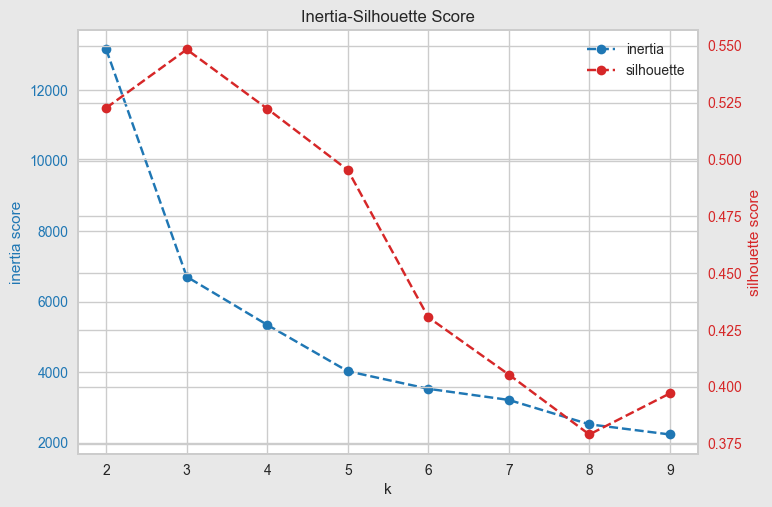

In [23]:
inertia = []
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=randomstate, n_init="auto")
    kmeans.fit(dfpca)
    inertia.append(kmeans.inertia_)
    cluster_label = kmeans.labels_
    silhouette.append(silhouette_score(dfpca, cluster_label))


fig, ax1 = plt.subplots()
fig.set_facecolor("#E8E8E8")

ax1.set_xlabel("k")
ax1.set_ylabel("inertia score", color="tab:blue")
ax1.plot(
    range(2, 10), inertia, marker="o", linestyle="--", color="tab:blue", label="inertia"
)
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()

ax2.set_ylabel("silhouette score", color="tab:red")
ax2.plot(
    range(2, 10),
    silhouette,
    marker="o",
    linestyle="--",
    color="tab:red",
    label="silhouette",
)
ax2.tick_params(axis="y", labelcolor="tab:red")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

plt.title("Inertia-Silhouette Score")
# plt.grid(False)
plt.show()

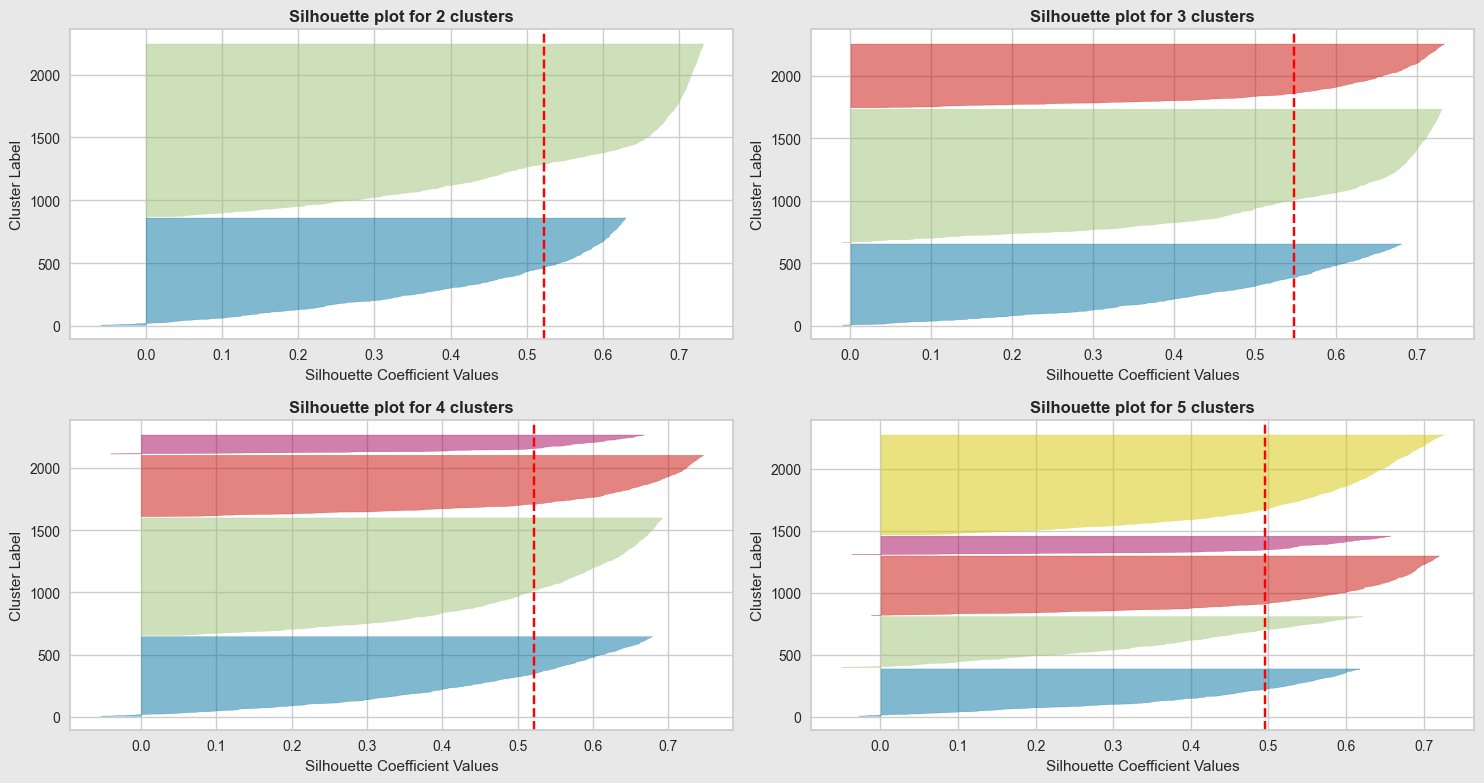

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
fig.set_facecolor("#E8E8E8")
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=randomstate, n_init='auto')
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax[q - 1][mod])
    visualizer.fit(dfpca)
    ax[q - 1][mod].set_title(f'Silhouette plot for {i} clusters', fontsize=12, fontweight='bold')
    ax[q - 1][mod].set_xlabel('Silhouette Coefficient Values')  # Set x-label
    ax[q - 1][mod].set_ylabel('Cluster Label')  # Set y-label
    plt.tight_layout()

optimal n_cluster = 4

In [25]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=randomstate, n_init='auto')
kmeans.fit(dfpca)
dfpca['cluster'] = kmeans.labels_
dfpca

,PC1,PC2,cluster
0,5.206426,-0.124662,2
1,-3.386093,-0.401018,1
2,2.800776,-0.865664,2
3,-3.195537,-1.310571,1
4,-0.714783,0.812138,0
...,...,...,...
2235,1.947495,2.151796,0
2236,-1.408851,3.287527,0
2237,2.490062,-1.203548,2
2238,1.884346,1.795155,0


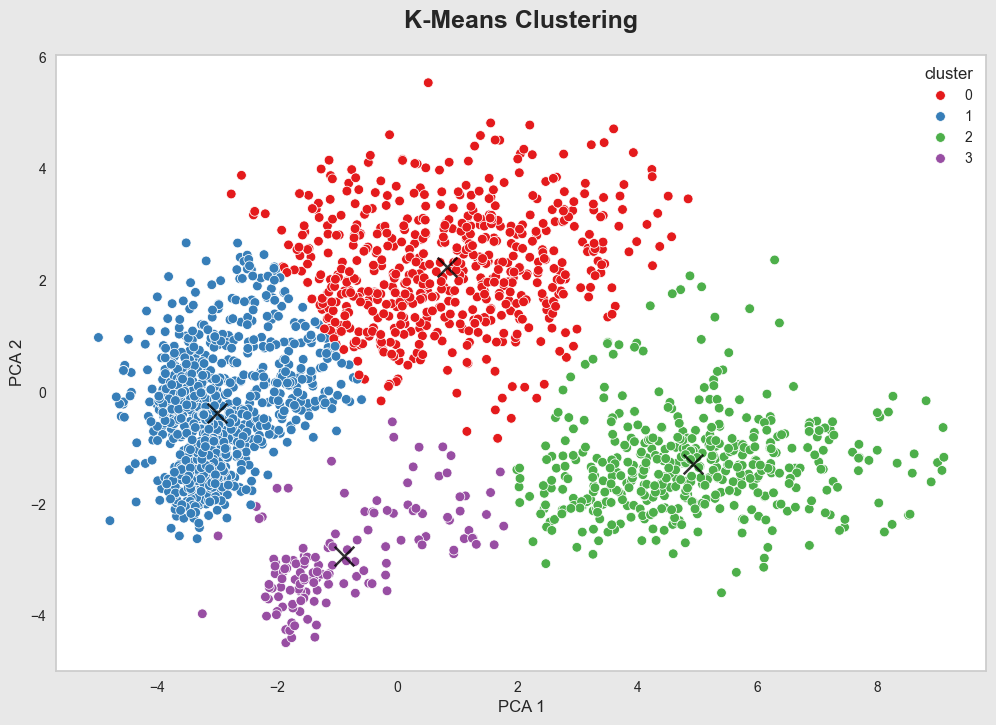

In [26]:
plt.figure(figsize=(12,8), facecolor='#E8E8E8')
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=dfpca, palette='Set1')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.8, marker='x')

plt.title('K-Means Clustering', fontsize=18, fontweight='bold', y=1.03)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.grid(False)
plt.show()


In [27]:
df_clust = dfp_noutlier.copy()
label = dfpca['cluster']
df_clust['cluster'] = label
# df_clust

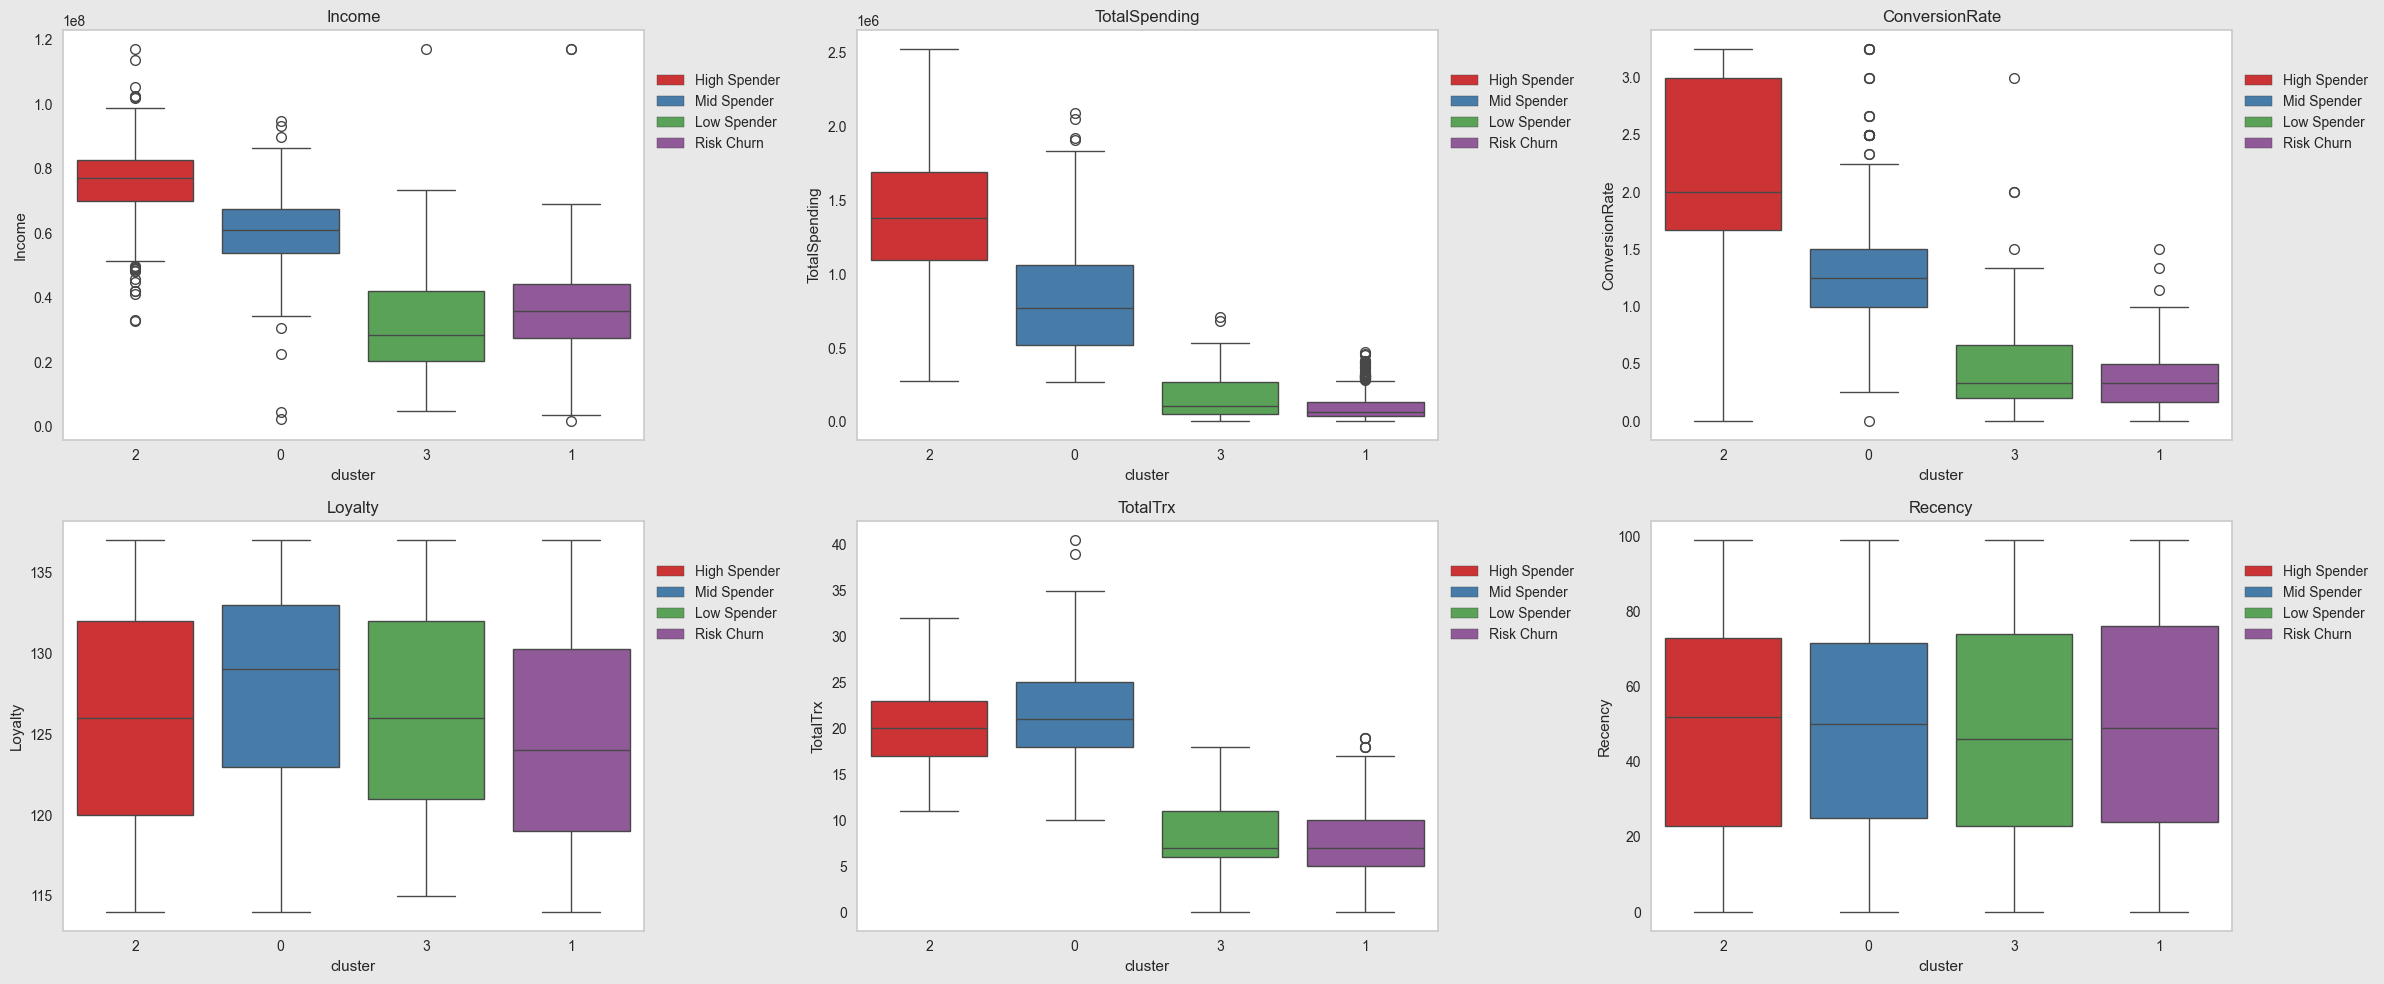

In [28]:
features = ['Income', 'TotalSpending', 'ConversionRate', 'Loyalty', 'TotalTrx', 'Recency', 'cluster']
features.remove('cluster')

n = len(features)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

# Create a figure and a grid of subplots
fig, ax = plt.subplots(nrows, ncols, figsize=(24, nrows*5))
fig.set_facecolor('#E8E8E8')

# Flatten the axes array
ax = ax.flatten()

# cluster order
cluster_order = [2, 0, 3, 1]

# Create subplots for each feature
for i, feature in enumerate(features):
    sns.boxplot(data=df_clust, y=feature, x='cluster', hue='cluster', palette='Set1', ax=ax[i], order=cluster_order, hue_order=cluster_order)
    ax[i].set_title(feature)
    ax[i].grid(False)
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.8))

    # Change the labels of the hue
    hue_labels = ['High Spender', 'Mid Spender', 'Low Spender', 'Risk Churn']
    legend = ax[i].get_legend()
    for text, label in zip(legend.texts, hue_labels):
        text.set_text(label)

plt.tight_layout()
plt.show()